## Trennung sich berührender Objekte
Ein häufiger Anwendungsfall für den Watershed-Algorithmus ist die Trennung sich berührender Objekte. In diesem Notebook werden wir Objekte in Binärbildern trennen, die eine rundliche Form haben und sich gegenseitig berühren.

In [1]:
from skimage.io import imread
import napari_segment_blobs_and_things_with_membranes as nsbatwm
import napari_simpleitk_image_processing as nsitk
import stackview

Ausgangspunkt dafür ist ein Binärbild, das beispielsweise durch [Schwellenwertbildung](image-segmentation:thresholding) erstellt wurde.

StackViewNDArray([[ 19,  29,  44, ...,  88, 115, 113],
                  [ 19,  29,  55, ...,  87, 101, 112],
                  [ 25,  36,  61, ...,  90,  90, 106],
                  ...,
                  [ 20,  21,  20, ...,  57,  33,  40],
                  [ 22,  25,  25, ...,  41,  34,  40],
                  [ 20,  25,  18, ...,  41,  35,  39]], dtype=uint8)
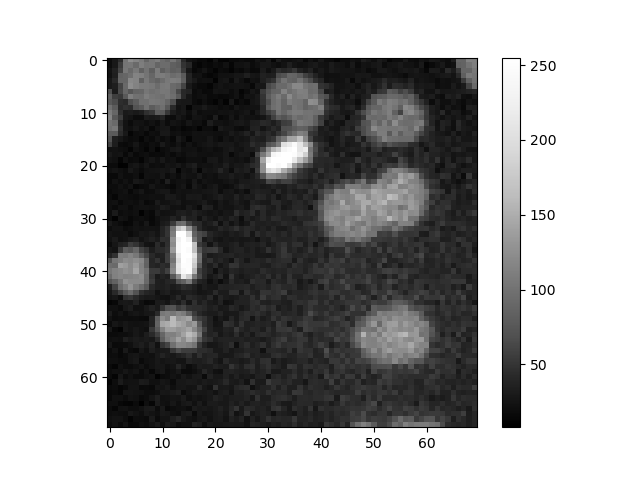
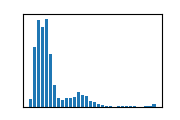

In [2]:
nuclei = imread('../../data/mitosis_mod.tif')

stackview.insight(nuclei)

<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


StackViewNDArray([[False, False, False, ...,  True,  True,  True],
                  [False, False, False, ...,  True,  True,  True],
                  [False, False, False, ...,  True,  True,  True],
                  ...,
                  [False, False, False, ..., False, False, False],
                  [False, False, False, ..., False, False, False],
                  [False, False, False, ..., False, False, False]])
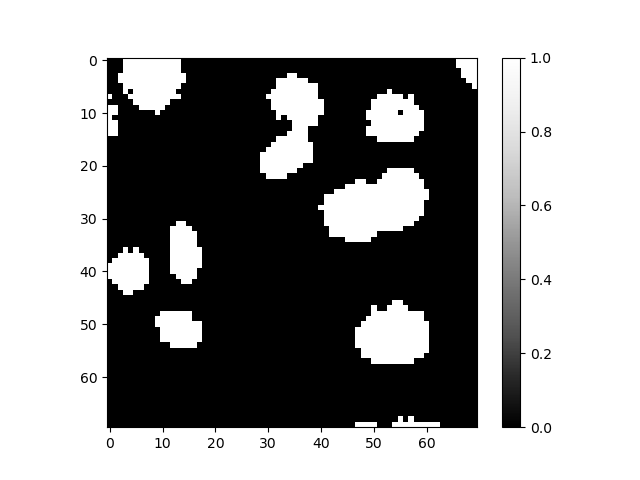
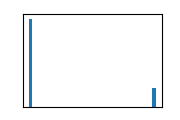

In [3]:
binary = nsbatwm.threshold_otsu(nuclei).astype(bool)

binary

Wir können dann die sich berührenden Objekte trennen, indem wir nur das Binärbild berücksichtigen. Der zugrunde liegende Algorithmus zielt darauf ab, ähnliche Ergebnisse wie [ImageJs binärer Watershed-Algorithmus](https://imagej.nih.gov/ij/docs/menus/process.html#watershed) zu produzieren, und die Implementierung hier funktioniert auch in 3D.

StackViewNDArray([[False, False, False, ...,  True,  True,  True],
                  [False, False, False, ...,  True,  True,  True],
                  [False, False, False, ...,  True,  True,  True],
                  ...,
                  [False, False, False, ..., False, False, False],
                  [False, False, False, ..., False, False, False],
                  [False, False, False, ..., False, False, False]])
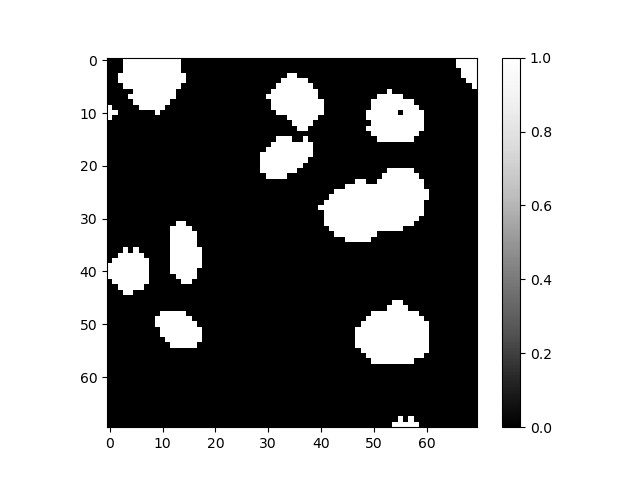
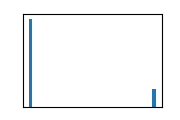

In [4]:
split_objects = nsbatwm.split_touching_objects(binary)
split_objects

Die Funktion `split_touching_objects` hat auch einen Parameter `sigma`, der es ermöglicht zu steuern, wie aggressiv Objekte getrennt werden sollen. Um mehr Trennungen vorzunehmen, geben Sie eine kleinere Zahl als 3.5 ein, was der Standardwert ist.

StackViewNDArray([[False, False, False, ...,  True,  True,  True],
                  [False, False, False, ...,  True,  True,  True],
                  [False, False, False, ...,  True,  True,  True],
                  ...,
                  [False, False, False, ..., False, False, False],
                  [False, False, False, ..., False, False, False],
                  [False, False, False, ..., False, False, False]])
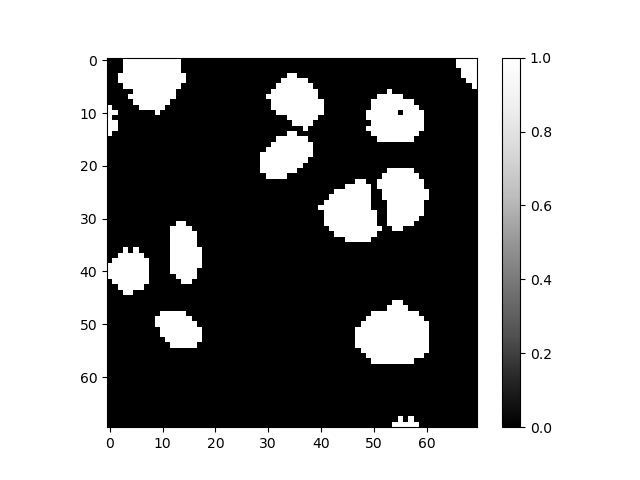
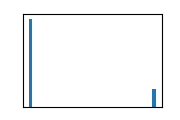

In [5]:
split_objects2 = nsbatwm.split_touching_objects(binary, sigma=2)
split_objects2

Es ist auch möglich, ein Labelbild als Ergebnis zu erhalten. Beachten Sie, dass in diesem Fall die schwarze Linie/Lücke zwischen den Objekten nicht vorhanden sein wird.

StackViewNDArray([[0, 0, 0, ..., 2, 2, 2],
                  [0, 0, 0, ..., 2, 2, 2],
                  [0, 0, 0, ..., 2, 2, 2],
                  ...,
                  [0, 0, 0, ..., 0, 0, 0],
                  [0, 0, 0, ..., 0, 0, 0],
                  [0, 0, 0, ..., 0, 0, 0]], dtype=uint32)
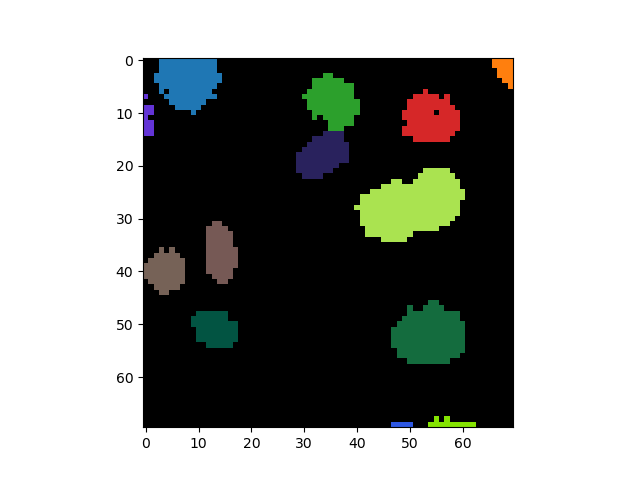

In [6]:
touching_labels = nsitk.touching_objects_labeling(binary)
touching_labels